# Import

In [8]:
import sympy as sp
from sympy import Matrix,I,det
from sympy import expand
from scipy.optimize import fsolve, minimize, root_scalar

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np; np.random.seed(1)
from scipy.optimize import root



In [9]:
import numpy as np
import scipy.integrate as integ
import scipy.interpolate as i2
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from astropy import units as u
from astropy import constants as c
# import cmath as cm
from shooting import *
import shootingres as shr
import shooting as sho

import scipy.optimize as o
try:
    import cPickle as pickle
except ImportError:
    import pickle

import pandas as pd 
# import ray

import seaborn as sns
sns.set_theme()
sns.set_style("white")
sns.set_style("ticks")
sns.set_style("ticks",{'axes.grid' : True})
import scienceplots
plt.style.use('science')

f = 16

In [10]:
## SET CONSTANTS
rho = (1.0*10**19) * (2.0*1.6725*10**(-27))
mu_0 = 1.2566*10**(-6)

# Define Normalizations
r1 = 0.1

## Define OMEGA0:
bb = 10000
v0 = bb/np.sqrt(r1)
Omega0 = v0/r1

# MCI Hain

C:\Users\Alex\AppData\Local\Temp\ipykernel_26508\2134647613.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('Re750_4_0.1_0_to_1.txt', header = None, delim_whitespace=True)


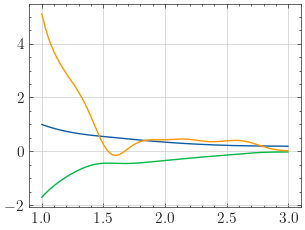

In [11]:
data = pd.read_csv('Re750_4_0.1_0_to_1.txt', header = None, delim_whitespace=True)
r_f = data[0]
W = data[1]
W_f = i2.CubicSpline(r_f, W)
Wp_f = W_f.derivative()
Wpp_f = Wp_f.derivative()

plt.figure()
plt.plot(r_f, W_f(r_f))
plt.plot(r_f, Wp_f(r_f))
plt.plot(r_f,Wpp_f(r_f))
plt.show()
plt.close()
def shoot_hain_v3(w, eta, qr, qrp, qi, qip,  k=np.pi/2, m=1, B0=0, Bz = 0, keplerian=True, cc=1, r2=5, max=500, q=1/2):
    ## DIFF IS INCLUDES IMAG
    y0 = [0.,1.+1.j]
    y = i.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(w,eta, qr, qrp, qi, qip, m,k,B0,Bz, keplerian,cc, q), max_step=24./(max/r2))
    r = np.sqrt(y.t)
    u = y.y[0]
    return ((u/r)[-1])

### REDONE DERIVATION
def shoot_setup_hain_v2(x, y, w, elecd, k2rs, k2rps, k2is, k2ips, m, kz=np.pi/4, B0=60, Bz=12.967, keplerian=True, cc=1, q=1/2):
    mu_0 = 1.2566*10**(-6)
     ### PM = 1
    r = np.sqrt(x)
    k2 = k2rs(r) + 1j*k2is(r)
    k2p = k2rps(r) + 1j*k2ips(r)
    vp1 = 1
    if keplerian == True:
        vp = vp1/(x**(1/4))
        W = vp/r
        Wp = -3/4*vp1/(x**(7/4)) * 2*r
        Wpp = 21/16*vp1/(x**(11/4)) * 4 * r**2
    elif keplerian == 'khalzov':
        W = vp1/x
        Wp = -vp1/x**2
    elif keplerian == 'rigid':
        W = vp1
        Wp = 0
    elif keplerian == False:
        vp = vp1/(x**(q/2))
        W = vp/r
        Wp = (-1*(q+1)/2)*(W/x)
    elif keplerian == 'saturated':
        A0 = 1.4923889E-02
        A1 = -1.0114824E-01
        A2 = 8.5753488E-02
        A3 = -2.8021088E-02
        A4 = -4.7882189E-01
        A5 = 1.0877462E-01
        A6 = 6.7857446E+00
        A7 = -5.0846913E+00
        A8 = -4.3114342E+01
        A9 = 5.2943846E+01
        A10 = 1.2219068E+02
        A11 = -1.9185099E+02
        A12 = -1.7535573E+02
        A13 = 3.4808679E+02
        A14 = 1.1975807E+02
        A15 = -3.4500839E+02
        A16 =  -1.4844420E+01
        A17 = 1.7930272E+02
        A18 = -2.5033736E+01
        ###  0.08875 + 0.91125/r**2 
        W = 0.08875 + 0.91125/r**2 + A0 + A1*(r-2) + A2*(r-2)**2+A3*(r-2)**3 + A4*(r-2)**4 + A5*(r-2)**5 + A6*(r-2)**6 + A7*(r-2)**7 + A8*(r-2)**8 + A9*(r-2)**9 + A10*(r-2)**10 + A11*(r-2)**11 + A12*(r-2)**12 + A13*(r-2)**13 + A14*(r-2)**14 + A15*(r-2)**15 + A16*(r-2)**16 + A17*(r-2)**17 + A18*(r-2)**18 - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**19 - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**20
        Wp = - 2 * 0.91125/r**3  + A1 + 2*A2*(r-2) + 3*A3*(r-2)**2 + 4*A4*(r-2)**3 + 5*A5*(r-2)**4 + 6*A6*(r-2)**5 + 7*A7*(r-2)**6 + 8*A8*(r-2)**7 + 9*A9*(r-2)**8 + 10*A10*(r-2)**9 + 11*A11*(r-2)**10 + 12*A12*(r-2)**11 + 13*A13*(r-2)**12 + 14*A14*(r-2)**13 + 15*A15*(r-2)**14 + 16*A16*(r-2)**15 + 17*A17*(r-2)**16 + 18*A18*(r-2)**17 - 19*( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**18 - 20*( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**19
        Wpp = 3 * 2 * 0.91125/r**4  + 2*A2 + 3 * 2 * A3*(r-2) + 4 * 3 * A4*(r-2)**2 + 5 * 4 * A5*(r-2)**3 + 6 * 5 * A6*(r-2)**4 + 7 * 6 * A7*(r-2)**5 + 8 * 7 * A8*(r-2)**6 + 9 * 8 * A9*(r-2)**7 + 10 * 9  * A10*(r-2)**8 + 11 * 10 * A11*(r-2)**9 + 12 * 11 * A12*(r-2)**10 + 13 * 12 * A13*(r-2)**11 + 14 * 13 * A14*(r-2)**12 + 15 * 14 * A15*(r-2)**13 + 16 * 15 * A16*(r-2)**14 + 17 * 16 * A17*(r-2)**15 + 18 * 17 * A18*(r-2)**16 - 19 * 18 * ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**17 - 20 * 19 * ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**18 
        
    elif keplerian == 'saturated2':
        W = W_f(r)
        Wp = Wp_f(r)
        Wpp = Wpp_f(r)
    elif keplerian == 'tanh':
        a = c = b = d = 1
        d = 0.85
        W = d*np.tanh(-c*r+a)+b
        
        #Wp = -c *d*sech**2(a - c r)
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv3':
        a = c = b = d = 1
        d = 0.84
        W = d*np.tanh(-c*r+a)+b
        
        #Wp = -c *d*sech**2(a - c r)
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv4':
        a = c = b = d = 1
        a = 0.6
        c = a
        d = 0.9
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'mKep':
        r10 = 1.5
        R0 = 1

        if(r < r10):
            W = 1
            Wp = 0
            Wpp = 0
        else:
            W = 1/(1+((r-r10)/R0)**(3/2))
            Wp = -3/(2*R0)*((r-r10)/R0)**(1/2)/(1+((r-r10)/R0)**(3/2))**2
            u = 1+((r-r10)/R0)**(3/2)
            up = 3/(2*R0)*((r-r10)/R0)**(1/2)
            Wpp = -( (3/(4*R0**2)*(1/R0*(r-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r-r10))**(1/2))*2*u*up)/(u**4)
        
    # Define Normalizations
    r1 = 0.1

    ## Define OMEGA0:
    bb = 10000
    v0 = bb/np.sqrt(r1)
    Omega0 = v0/r1

    vAp1 = B0/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    vAp = vAp1/np.sqrt(x)
    vAz = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    ### MODIFY w
    wA = (m/np.sqrt(x))*vAp + kz*vAz
    wb = w-m*W
    wc = 2*vAp/np.sqrt(x)*cc
    
    wAp = -m*vAp1/x**2*2*r
    wcp = -2*vAp1/x**2*cc*2*r


    # elecd = elecd / (r1**2*Omega0)*2
    elecd = elecd / (r1**2*Omega0)
    nu = elecd*1

    ### Note this is k2p with respect to r.
    wbp = -m*Wp
    wbpp = -m*Wpp
    lnu = -1j*wb + nu*k2
    lnup = -1j*wbp + nu*k2p
    leta = -1j*wb + elecd*k2
    letap = -1j*wbp + elecd*k2p
    
    L = lnu + wA**2/(leta)
    Lp = lnup + 2*wA*wAp/leta - wA**2*letap/(leta**2)
    h2 = kz**2 + m**2/r**2
    h = np.sqrt(h2)
    hp = -1/h*(m**2/r**3)
    E = L**2 + L*r/leta * wc * (1j*wA*Wp/leta - 1/2*wcp) + 2*(W - 1j*1/2*wc*wA/leta)*(2*W + (1+wA**2/leta**2)*r*Wp - 1j*wA*wc/leta)
    f = 2*r**2*(leta*lnu + wA**2)/((kz**2*r**2+m**2))
    fp = 1/(kz**2*r**2+m**2) * (4*r*(leta*lnu + wA**2) +2*r**2*(letap*lnu+leta*lnup + 2*wA*wAp)) - 1/(kz**2*r**2+m**2)**2 * (4*kz**2*r**3*(lnu*leta + wA**2))
    s = (1j*m*(lnu - leta)/(h**2*r)*Wp)
    g_dr_num_undiff = ((leta - lnu) * r * Wp + 2*(W*leta - 1/2*1j*wc*wA)) ## modified
    g_dr_num_diff = (letap - lnup) * r * Wp + (leta - lnu)*(Wp + r*Wpp) + 2*(Wp*leta + W*letap - 1/2*1j*wcp*wA - 1/2*1j*wc*wAp)
    g_dr_denom_undiff = h**2*r**2
    g_dr_denom_diff = 2*h*hp*r**2 + 2*h**2*r
    g_dr_term = 1j*m*(g_dr_num_diff/g_dr_denom_undiff - g_dr_num_undiff*g_dr_denom_diff/g_dr_denom_undiff**2)

    g = g_dr_term + E*leta/(L*r) - (W - 1j*1/2*wc*wA/leta)*(2*m**2/(L*h**2*r**3))*((leta - lnu)*r*Wp + 2*(W*leta - 1j * 1/2*wA*wc))

    u, du = y

    ### REWRITE ALL TERMS
    f = leta*L/(h**2*r)
    fp = (letap*L + leta*Lp)/(h**2*r) - leta*L*(2*h*hp*r+h**2)/(h**2*r)**2

    u_coeff = 1/(-4*r)*-g
    du_coeff = -1/(4*r)*(2*(f+r*fp)) - s/(2)
    d2u_coeff = -r*f
    dudx = [du, (1/d2u_coeff)*(-du_coeff*du - u_coeff*u)]

    return dudx


# Dispersion Relation

In [12]:
def Non_Ideal_Dispersion(x, pc0, param0, pc, param, η, Pm, keplerian = True, bDir = 'z', dc = 1, r = 1, axi = 1):
    # x is a real array, so we'll decompose it into real and imaginary parts
    x_real = x[0]
    x_imag = x[1]
    
    wb = x_real + 1j*x_imag
    
    ## Define r
    r = 1
    x = r**2
    ## Define dΩ/dlnr
    r1 = 0.1
    Omega0 = 10000/(r1**(3/2))
    if(pc == 'kz'):
        kz = param
        m = axi
        kr = 0
        η = η / (r1**2*Omega0)
        nu = η*Pm
    elif(pc == 'm'):
        kz = 1
        m = param
        kr = 0
        η = η / (r1**2*Omega0)
        nu = η*Pm
    elif(pc == 'kr'):
        kz = 1
        m = axi
        kr = param
        η = η / (r1**2*Omega0)
        nu = η*Pm
    elif(pc == 'Rm'):
        kz = 1
        m = axi
        kr = 0
        η = param / (r1**2*Omega0)
        nu = η*Pm
        
    if(pc0 == 'vA'):
        vA = param0
        # print(f'vA = {vA}')
   
    kφ = m/r
    krb = kr + dc/r
    k = np.sqrt(kr*krb + kφ**2 + kz**2)
    
    vp1 = 1
    q = 2
    i = 0
    if(i == 0):
        if keplerian == True:
            vp = vp1/(x**(1/4))
            W = vp/r
            Wp = -3/4*vp1/(x**(7/4)) * 2*r
            Wpp = 21/16*vp1/(x**(11/4)) * 4 * r**2
        elif keplerian == 'Sh2':
            W = 1/r**2
            Wp = -2/r**3
        elif keplerian == 'khalzov':
            W = vp1/x
            Wp = -vp1/x**2
        elif keplerian == 'rigid':
            W = vp1
            Wp = 0
        elif keplerian == False:
            vp = vp1/(x**(q/2))
            W = vp/r
            Wp = (-1*(q+1)/2)*(W/x)
        elif keplerian == 'saturated':
            A0 = 1.4923889E-02
            A1 = -1.0114824E-01
            A2 = 8.5753488E-02
            A3 = -2.8021088E-02
            A4 = -4.7882189E-01
            A5 = 1.0877462E-01
            A6 = 6.7857446E+00
            A7 = -5.0846913E+00
            A8 = -4.3114342E+01
            A9 = 5.2943846E+01
            A10 = 1.2219068E+02
            A11 = -1.9185099E+02
            A12 = -1.7535573E+02
            A13 = 3.4808679E+02
            A14 = 1.1975807E+02
            A15 = -3.4500839E+02
            A16 =  -1.4844420E+01
            A17 = 1.7930272E+02
            A18 = -2.5033736E+01
            ###  0.08875 + 0.91125/r**2 
            W = 0.08875 + 0.91125/r**2 + A0 + A1*(r-2) + A2*(r-2)**2+A3*(r-2)**3 + A4*(r-2)**4 + A5*(r-2)**5 + A6*(r-2)**6 + A7*(r-2)**7 + A8*(r-2)**8 + A9*(r-2)**9 + A10*(r-2)**10 + A11*(r-2)**11 + A12*(r-2)**12 + A13*(r-2)**13 + A14*(r-2)**14 + A15*(r-2)**15 + A16*(r-2)**16 + A17*(r-2)**17 + A18*(r-2)**18 - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**19 - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**20
            Wp = - 2 * 0.91125/r**3  + A1 + 2*A2*(r-2) + 3*A3*(r-2)**2 + 4*A4*(r-2)**3 + 5*A5*(r-2)**4 + 6*A6*(r-2)**5 + 7*A7*(r-2)**6 + 8*A8*(r-2)**7 + 9*A9*(r-2)**8 + 10*A10*(r-2)**9 + 11*A11*(r-2)**10 + 12*A12*(r-2)**11 + 13*A13*(r-2)**12 + 14*A14*(r-2)**13 + 15*A15*(r-2)**14 + 16*A16*(r-2)**15 + 17*A17*(r-2)**16 + 18*A18*(r-2)**17 - 19*( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**18 - 20*( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**19
            Wpp = 3 * 2 * 0.91125/r**4  + 2*A2 + 3 * 2 * A3*(r-2) + 4 * 3 * A4*(r-2)**2 + 5 * 4 * A5*(r-2)**3 + 6 * 5 * A6*(r-2)**4 + 7 * 6 * A7*(r-2)**5 + 8 * 7 * A8*(r-2)**6 + 9 * 8 * A9*(r-2)**7 + 10 * 9  * A10*(r-2)**8 + 11 * 10 * A11*(r-2)**9 + 12 * 11 * A12*(r-2)**10 + 13 * 12 * A13*(r-2)**11 + 14 * 13 * A14*(r-2)**12 + 15 * 14 * A15*(r-2)**13 + 16 * 15 * A16*(r-2)**14 + 17 * 16 * A17*(r-2)**15 + 18 * 17 * A18*(r-2)**16 - 19 * 18 * ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**17 - 20 * 19 * ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**18 
            
        elif keplerian == 'saturated2':
            W = W_f(r)
            Wp = Wp_f(r)
            Wpp = Wpp_f(r)
        elif keplerian == 'tanh':
            a = c = b = d = 1
            a = 0.6
            c = a
            d = 0.9
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'exp1':
            a = 1
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp2':
            a = 1
            W = a*r*np.exp(1-r) + (1-a)
            Wp = a*np.exp(1-r)*(1-r)
            Wpp = a*np.exp(1-r)*(r-2)
        elif keplerian == 'exp3':
            a = .75
            W = a*r*np.exp(1-r) + (1-a)
            Wp = a*np.exp(1-r)*(1-r)
            Wpp = a*np.exp(1-r)*(r-2)
        elif keplerian == 'exp4':
            a = 0.73123123
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp5':
            a = 0.8689352412721272
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp6':
            a = 0.9366210025563255
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp7':
            a = 0.9448239074457745
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp8':
            a = 0.9409132827360274
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp9':
            a = 0.9375052606522065
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'q_prof':
            W = 1/r**q
            Wp = -q*1/r**(q+1)
            Wpp = (q+1)*q*1/r**(q+2)
        elif keplerian == 'con':
            W = 1
            Wp = 0
            Wpp = 0
        elif keplerian == 'tanhv5':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.77
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv6':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.5940
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv7':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.7488
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv8':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.8463
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv9':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.8158134053621449
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv10':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.8303
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv3':
            a = c = b = d = 1
            d = 0.84
            W = d*np.tanh(-c*r+a)+b
            
            #Wp = -c *d*sech^2(a - c r)
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'q_prof_2':
            q = 2
            W = 1/r**q
            Wp = -q*1/r**(q+1)
            Wpp = (q+1)*q*1/r**(q+2)
        elif keplerian == 'q_prof_1p25':
            q = 1.25
            W = 1/r**q
            Wp = -q*1/r**(q+1)
            Wpp = (q+1)*q*1/r**(q+2)
        elif keplerian == 'q_prof_1p75':
            q = 1.75
            W = 1/r**q
            Wp = -q*1/r**(q+1)
            Wpp = (q+1)*q*1/r**(q+2)
    ###
    Ω = W
    dΩ = r*Wp
    κ = 4*Ω**2 + 2*W*dΩ
    # print(f'Ω = {Ω}')
    # print(f'Ωp = {Wp}')
    # print(f'κ = {κ}')
    if(bDir == 'z'):
        wA = kz*vA
        wc = 0
    elif(bDir == 'phi'):
        wA = m/r**2*vA
        wc = 2*vA/r**2*dc
        
        # print(f'dc = {dc}')
        # print(f'wc = {wc}')

    A = np.array([
            [1j*wb - η*(k**2 + dc/r**2), -2*1j*η*kφ/r*dc, 1j*wA, 0],
            [dΩ + 2*1j*η*kφ/r*dc, 1j*wb - η*(k**2 + dc/r**2), wc, 1j*wA],
            [1j*(1 + krb*kr/kz**2)*wA, 1j*kr*kφ*wA/kz**2 - wc/2, 1j*wb - nu*(k**2 + dc/r**2), 2*Ω - 2*1j*nu*kφ/r*dc + 1j*wb*kr*kφ/kz**2],
            [1j*krb*kφ*wA/kz**2, 1j*(1+kφ**2/kz**2)*wA, -κ**2/(2*Ω) + 2*1j*nu*kφ/r*dc + 1j*wb*krb*kφ/kz**2, 1j*wb - nu*(k**2 + dc/r**2)]
        ], dtype=complex)    
    # display(A)
    # Compute the determinant of the complex matrix
    det = np.linalg.det(A)
    
    # Return the real and imaginary parts of the determinant
    return [np.real(det), np.imag(det)]


In [13]:
def Root_Solver(guess0, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m):

    if(np.abs(guess0) == 0):
        initial_guesses = [[0, 0], [0.5,0.5], [1, 1], [0,0.5], [0, 1], [0, 0.25], [0, 0.75], [0,0.125]]  # Complex guesses as [real, imag]
    else:
        initial_guesses = [[guess0.real, guess0.imag]]
        
    # Store the roots   
    roots = []

    errors = 0
    # Use fsolve to find the roots for each initial guess
    for guess in initial_guesses:
        # sol = root(Non_Ideal_Dispersion, guess, args = ('vA', p0, 'kz', p1, η, Pm, keplerian, bDir, dc, r, axi), method = 'lm')  # fsolve handles the real and imaginary parts separately
        sol = root(Non_Ideal_Dispersion, guess, args = (pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m), method = 'lm')  # fsolve handles the real and imaginary parts separately
        # sol = root(Non_Ideal_Dispersion, guess, args = (pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, axi))  # fsolve handles the real and imaginary parts separately

        # print(sol)
        if sol.success:  # Check if the solution was successful
            roots.append(sol.x)  # root returns the real and imaginary parts of the solution
        if(sol.success == False):
            errors+=1

    if(len(roots) == 0):
        initial_guesses = [[0, 0], [0.5,0.5], [1, 1], [0,0.5], [0, 1], [0, 0.25], [0, 0.75], [0,0.125], [0,0.125/2]]  # Complex guesses as [real, imag]

        # Store the roots   
        roots = []

        errors = 0
        # Use fsolve to find the roots for each initial guess
        for guess in initial_guesses:
            # sol = root(Non_Ideal_Dispersion, guess, args = ('vA', p0, 'kz', p1, η, Pm, keplerian, bDir, dc, r, axi), method = 'lm')  # fsolve handles the real and imaginary parts separately
            sol = root(Non_Ideal_Dispersion, guess, args = (pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m), method = 'lm')  # fsolve handles the real and imaginary parts separately
            # sol = root(Non_Ideal_Dispersion, guess, args = (pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, axi))  # fsolve handles the real and imaginary parts separately

            # print(sol)
            if sol.success:  # Check if the solution was successful
                roots.append(sol.x)  # root returns the real and imaginary parts of the solution
            if(sol.success == False):
                errors+=1
                
    # Convert the solutions back to complex numbers and remove duplicates
    unique_roots = np.unique([complex(r[0], r[1]) for r in roots])
    # print(f"Roots: {unique_roots}")
    maximal_root = 0
    for l in range(0,len(unique_roots)):
        if(unique_roots[l].imag > maximal_root):
            maximal_root = unique_roots[l]
    return maximal_root
                

# Numerical Bz

## Finite Curvature

### Ideal

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kz'
n = 130
param0 = np.linspace(0,1, n)
param1 = np.linspace(.1,4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()


KeyboardInterrupt: 

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'm'
n = 130
param0 = np.linspace(0, 1.75, n)
param1 = np.linspace(0, 10, n)

# print(param0)
# print(param1)
M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kr'
n = 130
param0 = np.linspace(0,1.4, n)
param1 = np.linspace(0,1.4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kr'
n = 200
param0 = np.linspace(0,2, n)
param1 = np.linspace(0,3, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = -1j*param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
# if(pc1 != 'm'):
#     if(keplerian == True):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
#     elif(keplerian == 'q_prof_1p25'):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
#     elif(keplerian == 'q_prof_1p75'):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
#     elif(keplerian == 'q_prof_2'):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
# else:
#     if(keplerian == True):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
#     elif(keplerian == 'q_prof_1p25'):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
#     elif(keplerian == 'q_prof_1p75'):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
#     elif(keplerian == 'q_prof_2'):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

### Non Ideal

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 100
Pm = 1
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kz'
n = 600
param0 = np.linspace(0,1, n)
param1 = np.linspace(.1,4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
        
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()


In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 100
Pm = 1
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'm'
n = 130
param0 = np.linspace(0,2, n)
param1 = np.linspace(0,10, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()


In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 100
Pm = 1
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kr'
n = 130
param0 = np.linspace(0,1.4, n)
param1 = np.linspace(0,1.4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)

if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 100
Pm = 1
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kr'
n = 200
param0 = np.linspace(0,2, n)
param1 = np.linspace(0,3, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = -1j*param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)

# if(pc1 != 'm'):
#     if(keplerian == True):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
#     elif(keplerian == 'q_prof_1p25'):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
#     elif(keplerian == 'q_prof_1p75'):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
#     elif(keplerian == 'q_prof_2'):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
# else:
#     if(keplerian == True):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
#     elif(keplerian == 'q_prof_1p25'):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
#     elif(keplerian == 'q_prof_1p75'):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
#     elif(keplerian == 'q_prof_2'):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

### Pm0

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 100
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kz'
n = 400
param0 = np.linspace(0,1, n)
param1 = np.linspace(.1,4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
        
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()


In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 100
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'm'
n = 100
param0 = np.linspace(0,2, n)
param1 = np.linspace(0,10, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
        
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 100
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kr'
n = 100
param0 = np.linspace(0,1.4, n)
param1 = np.linspace(0,1.4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
        
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

## Zero Curvature

### Ideal

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 0

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kz'
n = 200
param0 = np.linspace(0,1, n)
param1 = np.linspace(.1,4, n)

# print(param0)
# print(param1)
errors = 0
M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

print(errors)
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 0

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'm'
n = 100
param0 = np.linspace(0,2, n)
param1 = np.linspace(0,10, n)

# print(param0)
# print(param1)
errors = 0
M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

print(errors)
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 0

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kr'
n = 200
param0 = np.linspace(0,1, n)
param1 = np.linspace(0,1.75, n)

# print(param0)
# print(param1)
errors = 0
M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

print(errors)
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

### Non Ideal

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 100
Pm = 1
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 0

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kz'
n = 130
param0 = np.linspace(0,1, n)
param1 = np.linspace(.1,4, n)

# print(param0)
# print(param1)
errors = 0
M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        # if(int(i/10) == 0):
        #     if(int(j/10) == 0):
        #         if(i != 0):
        #             if(j != 0):
        #                 print(f'i = {10*int(100*i/n)}%, j = {10*int(100*j/n)}')
                
        p0 = param0[i]
        p1 = param1[j]
        
        # print(f'vA = {p0}')
        # print(f'kz = {p1}')
        # Define initial guesses as real and imaginary parts
        initial_guesses = [[0, 0], [0.5,0.5], [1, 1], [0,0.5], [0, 1], [0, 0.25], [0, 0.75], [0,0.125]]  # Complex guesses as [real, imag]

        # Store the roots   
        roots = []

        # Use fsolve to find the roots for each initial guess
        for guess in initial_guesses:
            # sol = root(Non_Ideal_Dispersion, guess, args = ('vA', p0, 'kz', p1, η, Pm, keplerian, bDir, dc, r, axi), method = 'lm')  # fsolve handles the real and imaginary parts separately
            sol = root(Non_Ideal_Dispersion, guess, args = (pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m), method = 'lm')  # fsolve handles the real and imaginary parts separately
            # sol = root(Non_Ideal_Dispersion, guess, args = (pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, axi))  # fsolve handles the real and imaginary parts separately

            # print(sol)
            if sol.success:  # Check if the solution was successful
                roots.append(sol.x)  # root returns the real and imaginary parts of the solution
            if(sol.success == False):
                errors+=1
    
        # Convert the solutions back to complex numbers and remove duplicates
        unique_roots = np.unique([complex(r[0], r[1]) for r in roots])
        # print(f"Roots: {unique_roots}")
        maximal_root = 0
        for l in range(0,len(unique_roots)):
            if(unique_roots[l].imag > maximal_root):
                maximal_root = unique_roots[l]
        # print(f'root = {maximal_root}')
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

print(errors)
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

## Cartesian

### Ideal

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 0

#### Radius
r = 1

#### Azimuthal mode number
m = 0

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kz'
n = 150
param0 = np.linspace(0,1, n)
param1 = np.linspace(.1,4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()


In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 0

#### Radius
r = 1

#### Azimuthal mode number
m = 0

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'm'
n = 150
param0 = np.linspace(0,2, n)
param1 = np.linspace(0,10, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()


### Non Ideal

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 100
Pm = 1
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 0

#### Radius
r = 1

#### Azimuthal mode number
m = 0

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kz'
n = 150
param0 = np.linspace(0,1, n)
param1 = np.linspace(.1,4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()


# Numerical Az

## Finite Curvature

### Ideal

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'phi'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kz'
n = 10
param0 = np.linspace(0,2, n)
param1 = np.linspace(.1,4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=6, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=6, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
# if(pc1 != 'm'):
#     if(keplerian == True):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
#     elif(keplerian == 'q_prof_1p25'):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
#     elif(keplerian == 'q_prof_1p75'):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
#     elif(keplerian == 'q_prof_2'):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
# else:
#     if(keplerian == True):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
#     elif(keplerian == 'q_prof_1p25'):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
#     elif(keplerian == 'q_prof_1p75'):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
#     elif(keplerian == 'q_prof_2'):
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
#         plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()


# Flow Variation

## exp5

### Ideal

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_1p25'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kz'
n = 130
param0 = np.linspace(0,1, n)
param1 = np.linspace(.1,4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)

if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()


In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_1p25'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'm'
n = 130
param0 = np.linspace(0,2, n)
param1 = np.linspace(0,10, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)

if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_1p25'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kr'
n = 200
param0 = np.linspace(0,1.4, n)
param1 = np.linspace(0,1.4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

### Non Ideal

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 100
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_1p25'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kz'
n = 700
param0 = np.linspace(0,1, n)
param1 = np.linspace(.1,4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)

if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()


In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 100
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_1p25'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'm'
n = 130
param0 = np.linspace(0,2, n)
param1 = np.linspace(0,10, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)

if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 100
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_1p25'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kr'
n = 130
param0 = np.linspace(0,1.4, n)
param1 = np.linspace(0,1.4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

## exp4

### Ideal

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_1p75'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kz'
n = 130
param0 = np.linspace(0,1, n)
param1 = np.linspace(.1,4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()


In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_1p75'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'm'
n = 130
param0 = np.linspace(0,2, n)
param1 = np.linspace(0,10, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()


In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_1p75'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kr'
n = 130
param0 = np.linspace(0,1.4, n)
param1 = np.linspace(0,1.4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()


### Non Ideal

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 100
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_2'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kz'
n = 400
param0 = np.linspace(0,1, n)
param1 = np.linspace(.1,4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()


In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 100
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_1p75'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'm'
n = 130
param0 = np.linspace(0,2, n)
param1 = np.linspace(0,10, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()


In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 100
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_1p75'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kr'
n = 130
param0 = np.linspace(0,1.4, n)
param1 = np.linspace(0,1.4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()


## Exp

### Ideal

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_2'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kz'
n = 130
param0 = np.linspace(0,1, n)
param1 = np.linspace(.1,4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_2'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'm'
n = 130
param0 = np.linspace(0,2, n)
param1 = np.linspace(0,10, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_2'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kr'
n = 130
param0 = np.linspace(0,1.4, n)
param1 = np.linspace(0,1.4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

### Non Ideal

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 100
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_2'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kz'
n = 400
param0 = np.linspace(0,1, n)
param1 = np.linspace(.1,4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 100
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_2'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'm'
n = 130
param0 = np.linspace(0,2, n)
param1 = np.linspace(0,10, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 100
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_2'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'kr'
n = 130
param0 = np.linspace(0,1.4, n)
param1 = np.linspace(0,1.4, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')

###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
# Add a small colorbar at the top right
# cax = fig.add_axes([0.3, .92, 0.6, 0.02])   # [left, bottom, width, height]
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 != 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

# Rm Sweep

## Keplerian

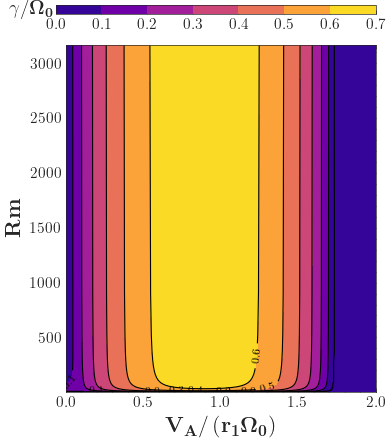

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 1
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'Rm'
n = 400
param0 = np.linspace(0,2, n)
param1 = np.linspace(1,1000, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
elif(pc1 == 'Rm'):
    ax.set_ylabel(r'\textbf{Rm}', fontsize = 16)
# Add a small colorbar at the top right
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 == 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
elif(pc1 == 'Rm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

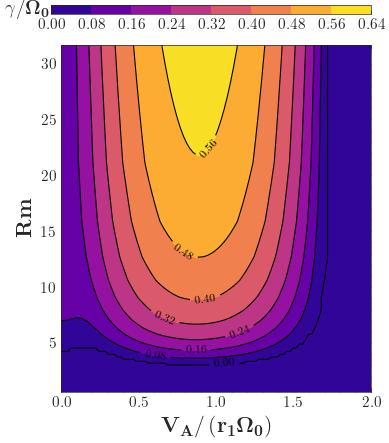

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 1
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'Rm'
n = 100
param0 = np.linspace(0,2, n)
param1 = np.linspace(100,5000, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
elif(pc1 == 'Rm'):
    ax.set_ylabel(r'\textbf{Rm}', fontsize = 16)
# Add a small colorbar at the top right
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 == 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
elif(pc1 == 'Rm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

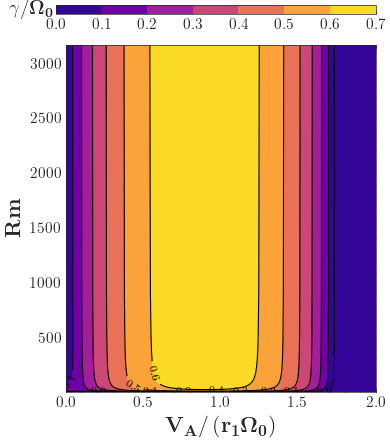

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'Rm'
n = 400
param0 = np.linspace(0,2, n)
param1 = np.linspace(1,1000, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
elif(pc1 == 'Rm'):
    ax.set_ylabel(r'\textbf{Rm}', fontsize = 16)
# Add a small colorbar at the top right
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 == 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
elif(pc1 == 'Rm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

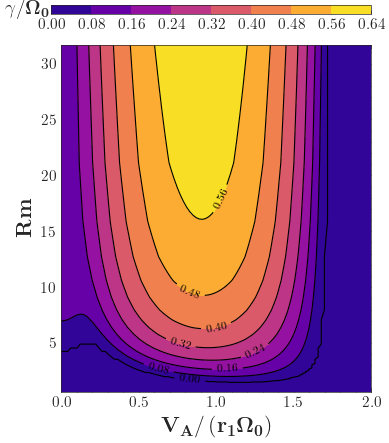

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = True

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'Rm'
n = 100
param0 = np.linspace(0,2, n)
param1 = np.linspace(100,5000, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
elif(pc1 == 'Rm'):
    ax.set_ylabel(r'\textbf{Rm}', fontsize = 16)
# Add a small colorbar at the top right
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 == 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
elif(pc1 == 'Rm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

## Tanh

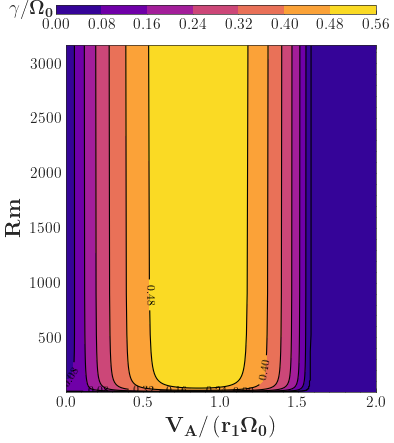

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 1
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_1p25'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'Rm'
n = 400
param0 = np.linspace(0,2, n)
param1 = np.linspace(1,1000, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
elif(pc1 == 'Rm'):
    ax.set_ylabel(r'\textbf{Rm}', fontsize = 16)
# Add a small colorbar at the top right
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 == 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
elif(pc1 == 'Rm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

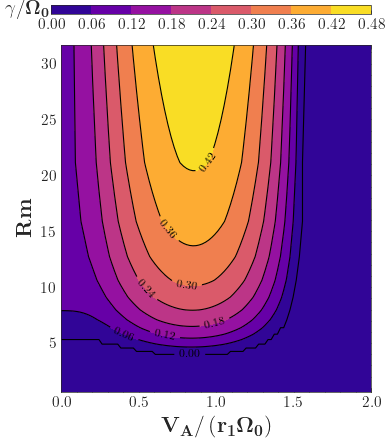

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 1
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_1p25'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'Rm'
n = 100
param0 = np.linspace(0,2, n)
# param1 = np.linspace(50,1000, n)
param1 = np.linspace(100,5000, n)


M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
elif(pc1 == 'Rm'):
    ax.set_ylabel(r'\textbf{Rm}', fontsize = 16)
# Add a small colorbar at the top right
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 == 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
elif(pc1 == 'Rm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

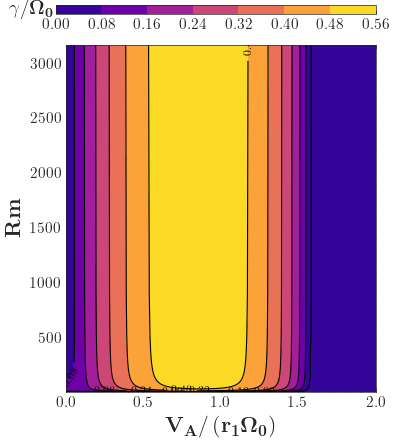

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_1p25'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'Rm'
n = 400
param0 = np.linspace(0,2, n)
param1 = np.linspace(1,1000, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
elif(pc1 == 'Rm'):
    ax.set_ylabel(r'\textbf{Rm}', fontsize = 16)
# Add a small colorbar at the top right
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 == 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
elif(pc1 == 'Rm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

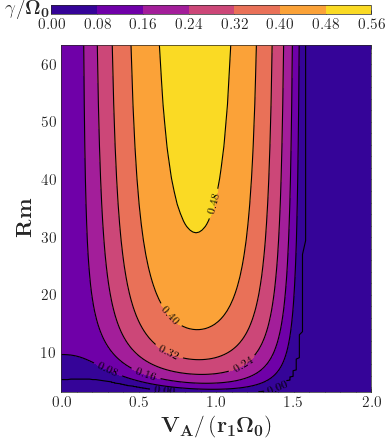

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_1p25'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'Rm'
n = 100
param0 = np.linspace(0,2, n)
param1 = np.linspace(50,1000, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
elif(pc1 == 'Rm'):
    ax.set_ylabel(r'\textbf{Rm}', fontsize = 16)
# Add a small colorbar at the top right
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 == 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
elif(pc1 == 'Rm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

## Sat

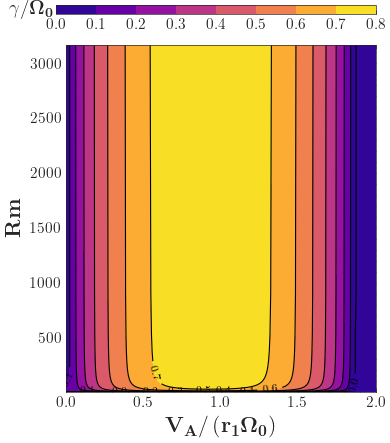

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 1
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_1p75'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'Rm'
n = 400
# n = 100
param0 = np.linspace(0,2, n)
param1 = np.linspace(1,1000, n)
# param1 = np.linspace(100,5000, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
elif(pc1 == 'Rm'):
    ax.set_ylabel(r'\textbf{Rm}', fontsize = 16)
# Add a small colorbar at the top right
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 == 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
elif(pc1 == 'Rm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

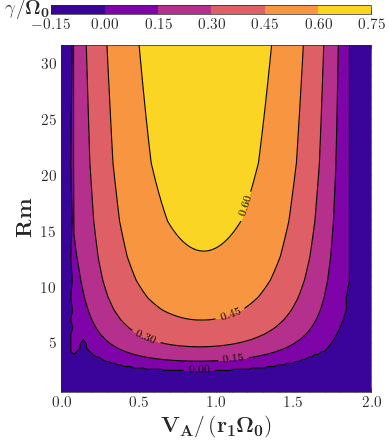

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 1
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_1p75'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'Rm'
n = 100
param0 = np.linspace(0,2, n)
param1 = np.linspace(1,1000, n)
param1 = np.linspace(100,5000, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
elif(pc1 == 'Rm'):
    ax.set_ylabel(r'\textbf{Rm}', fontsize = 16)
# Add a small colorbar at the top right
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 == 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
elif(pc1 == 'Rm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

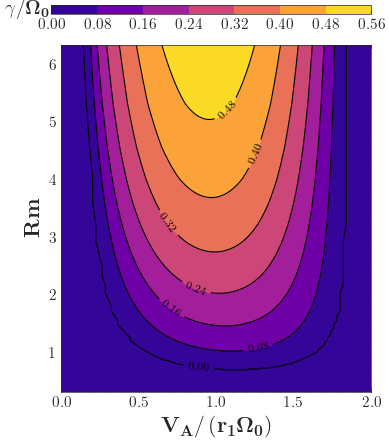

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_1p75'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'Rm'
n = 100
param0 = np.linspace(0,2, n)
param1 = np.linspace(500,10000, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
elif(pc1 == 'Rm'):
    ax.set_ylabel(r'\textbf{Rm}', fontsize = 16)
# Add a small colorbar at the top right
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 == 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
elif(pc1 == 'Rm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

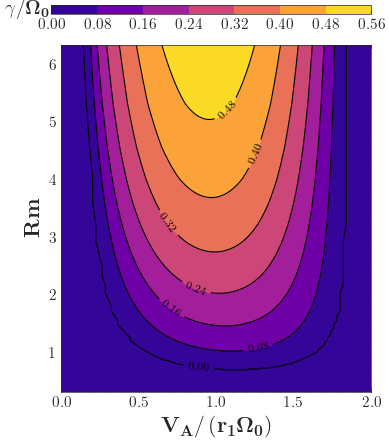

In [ ]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_1p75'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'Rm'
n = 100
param0 = np.linspace(0,2, n)
param1 = np.linspace(500,10000, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
elif(pc1 == 'Rm'):
    ax.set_ylabel(r'\textbf{Rm}', fontsize = 16)
# Add a small colorbar at the top right
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 == 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
elif(pc1 == 'Rm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

## Sh2

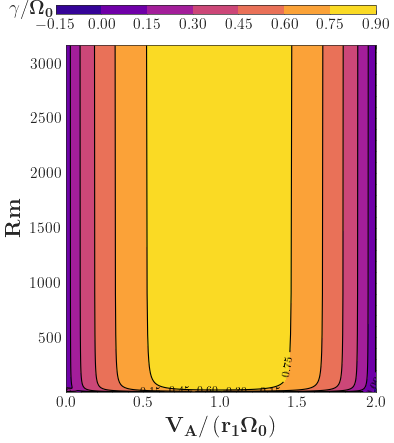

In [31]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 1
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_2'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'Rm'
n = 400
param0 = np.linspace(0,2, n)
param1 = np.linspace(1,1000, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
elif(pc1 == 'Rm'):
    ax.set_ylabel(r'\textbf{Rm}', fontsize = 16)
# Add a small colorbar at the top right
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 == 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
elif(pc1 == 'Rm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

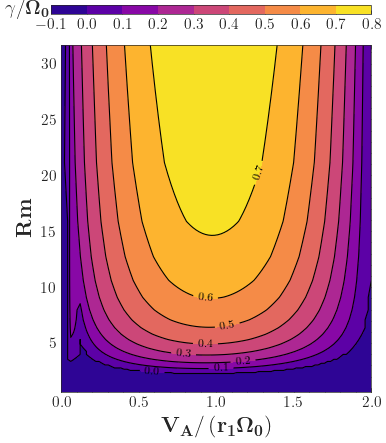

In [32]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 1
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_2'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'Rm'
n = 400
n = 100
param0 = np.linspace(0,2, n)
param1 = np.linspace(1,1000, n)
param1 = np.linspace(100,5000, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
elif(pc1 == 'Rm'):
    ax.set_ylabel(r'\textbf{Rm}', fontsize = 16)
# Add a small colorbar at the top right
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 == 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
elif(pc1 == 'Rm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

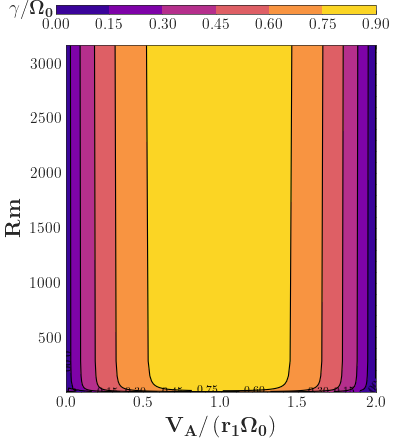

In [33]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_2'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'Rm'
n = 100
param0 = np.linspace(0,2, n)
param1 = np.linspace(1,1000, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
elif(pc1 == 'Rm'):
    ax.set_ylabel(r'\textbf{Rm}', fontsize = 16)
# Add a small colorbar at the top right
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 == 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
elif(pc1 == 'Rm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()

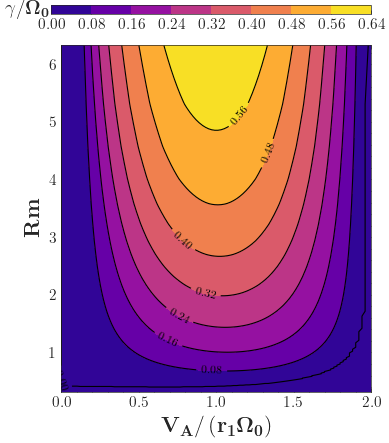

In [34]:
########## Choice of parameters ##########
# Non Ideal
η = 0
Pm = 0
nu = int(η*Pm)
#### Flow Choice
keplerian = 'q_prof_2'

#### Magnetic Field Configuration
bDir = 'z'

#### Curvature 
dc = 1

#### Radius
r = 1

#### Azimuthal mode number
m = 1

#### Parameter Sweep
pc0 = 'vA'
pc1 = 'Rm'
n = 100
param0 = np.linspace(0,2, n)
param1 = np.linspace(500,10000, n)

M = np.zeros((len(param0), len(param1)), dtype = 'complex')
for i in range(0, len(param0)):
    for j in range(0,len(param1)):
        p0 = param0[i]
        p1 = param1[j]

        if(j != 0):
            guess = M[i][j-1]
        else:
            guess = 0
        maximal_root = Root_Solver(guess, pc0, p0, pc1, p1, η, Pm, keplerian, bDir, dc, r, m)
        M[i][j] = maximal_root
        # print(f'Mij = {M[i][j]}')
###################### Growth Rate
fig, ax = plt.subplots(figsize=(4,4.5))
contour = plt.contourf(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, cmap = 'plasma')
contours = plt.contour(param0, r1**2*Omega0/param1, np.transpose(M.imag), levels=7, colors='black', linewidths=0.8)
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\mathbf{V_A/\left(r_1\Omega_0\right)}$', fontsize = 16)
if(pc1 == 'kz'):
    ax.set_ylabel(r'$\mathbf{k_z/r_1}$', fontsize = 16)
elif(pc1 == 'm'):
    ax.set_ylabel(r'$\mathbf{m}$', fontsize = 16)
elif(pc1 == 'kr'):
    ax.set_ylabel(r'$\mathbf{k_r/r_1}$', fontsize = 16)
elif(pc1 == 'Rm'):
    ax.set_ylabel(r'\textbf{Rm}', fontsize = 16)
# Add a small colorbar at the top right
cax = fig.add_axes([0.1, .95, 0.8, 0.02])
cbar = fig.colorbar(contour, cax=cax, orientation="horizontal")
cbar.ax.set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', labelpad=17.5, rotation=0, va='center', fontsize = 14)
if(pc1 == 'm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
elif(pc1 == 'Rm'):
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-Rm-Pm{Pm}' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
else:
    if(keplerian == True):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-Kep.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p25'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p25.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_1p75'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof1p75.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
    elif(keplerian == 'q_prof_2'):
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.pdf', dpi = 400, bbox_inches = 'tight')
        plt.savefig(f'Local/Dispersion-eta{η}-nu{nu}-' + pc0 + bDir + '-'+ pc1 + f'-dc{dc}' + f'-m{m}-qprof2.svg', dpi = 150, bbox_inches = 'tight', format = 'svg')
plt.show()